In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os
print(os.listdir("../input"))


['creditcard.csv']


In [2]:
# Loading data
data = pd.read_csv('../input/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# Checking if any null values in dataset
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

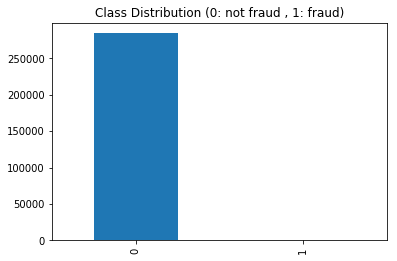

In [7]:
# Identify how much of dataset is fraud[1]/not fraud[0]
data['Class'].value_counts().plot.bar(title = 'Class Distribution (0: not fraud , 1: fraud)')

In [8]:
print('Number of not fraud: ', data['Class'].value_counts()[0])
print('Number of fraud: ', data['Class'].value_counts()[1])
print('Not fraud: ', round(data['Class'].value_counts()[0]/len(data)*100,2), '% of the dataset')
print('Fraud: ', round(data['Class'].value_counts()[1]/len(data)*100,2), '% of the dataset')

Number of not fraud:  284315
Number of fraud:  492
Not fraud:  99.83 % of the dataset
Fraud:  0.17 % of the dataset


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


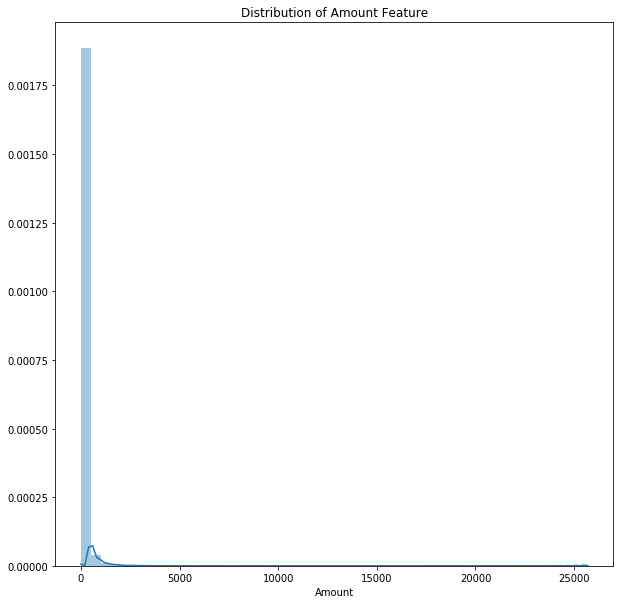

In [9]:
# Check the distribution of the amount feature
plt.figure(figsize = (10,10))
plt.title('Distribution of Amount Feature')
sns.distplot(data.Amount)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


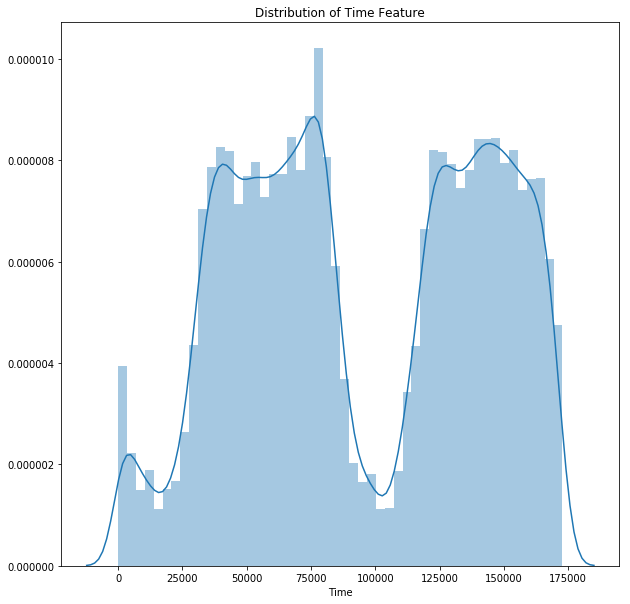

In [10]:
# Check distribution of time feature
plt.figure(figsize = (10,10))
plt.title('Distribution of Time Feature')
sns.distplot(data.Time)

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


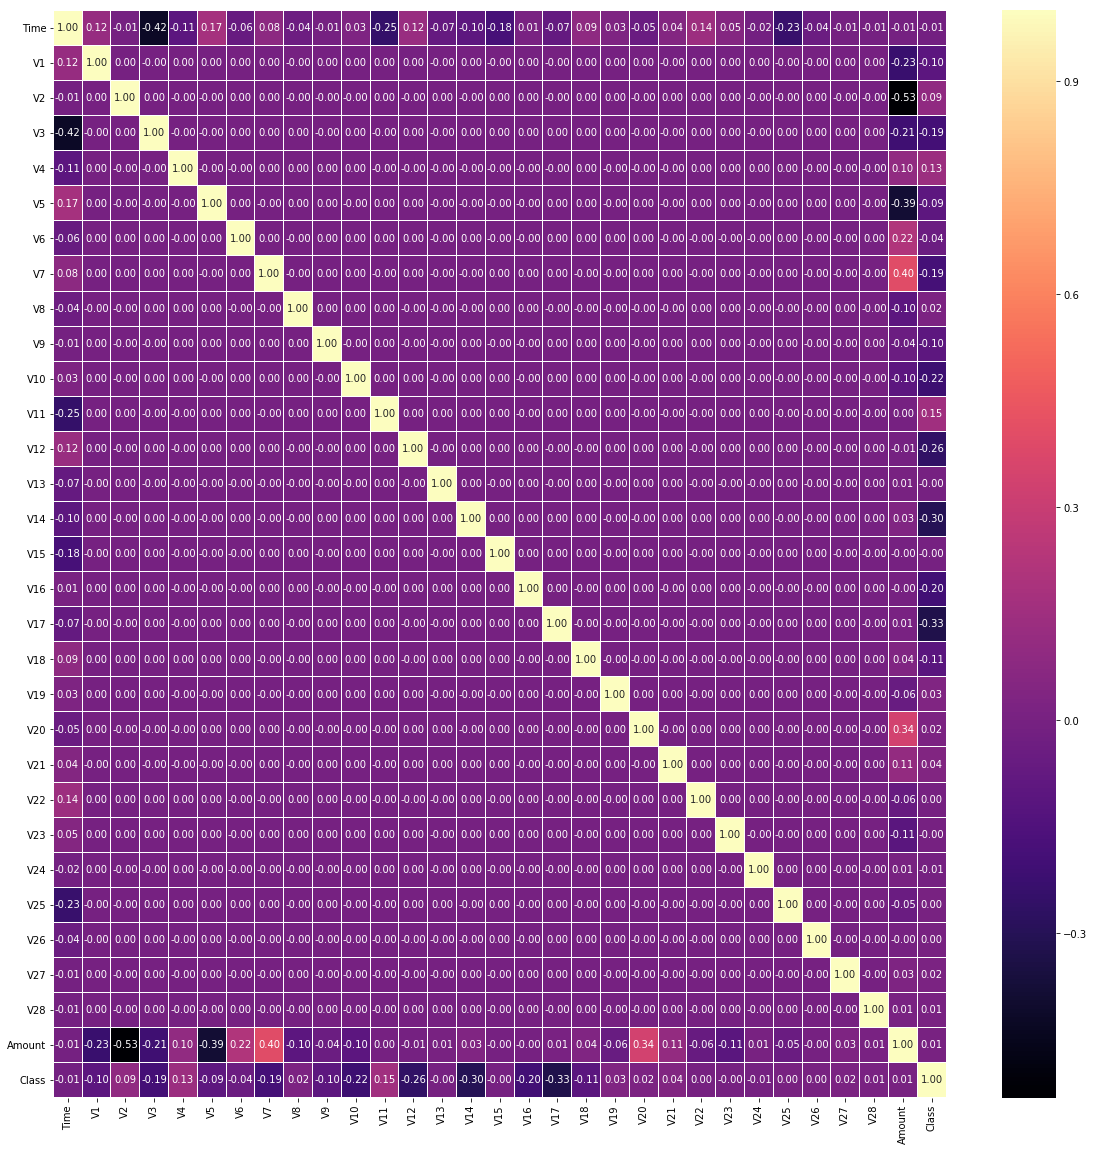

In [12]:
# Correlation heatmap
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [13]:
# Skew of data
data.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [14]:
# Scale Amount and Time feature
from sklearn.preprocessing import StandardScaler, RobustScaler

robust_scale = RobustScaler()

data['amount_scaled'] = robust_scale.fit_transform(data['Amount'].values.reshape(-1,1))
data['time_scaled'] = robust_scale.fit_transform(data['Time'].values.reshape(-1,1))

# Remove time and amount
data.drop(['Amount', 'Time'], axis = 1, inplace = True)

In [15]:
data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
271010,-1.509687,-0.022113,0.834205,-1.343572,2.243489,-0.535027,0.571269,-0.085746,-0.052706,-0.225099,-0.572198,-0.479186,-1.259223,0.240319,-0.900347,0.627744,-1.279165,0.257574,0.439682,-0.124464,-0.477371,-1.161685,-0.672402,-1.396839,0.676646,0.292829,0.009490,-0.207608,0,-0.271362,0.936089
281325,-0.091412,0.647202,0.118045,-0.772823,1.003169,0.480013,0.735784,0.286620,0.051926,-0.539770,-0.456284,0.008267,-0.693530,0.328183,0.497207,-0.964983,0.476960,-2.070771,-1.186206,-0.168200,-0.185464,-0.282683,0.167613,-1.145426,-0.725825,0.245778,0.294205,0.083740,0,-0.181793,1.003395
112087,1.203897,0.126060,0.597031,0.563339,-0.622239,-0.812380,-0.114574,-0.007133,-0.057338,0.136479,1.472776,0.523993,-0.936287,0.672981,0.440395,0.492534,-0.534871,0.024903,0.101498,-0.163093,-0.205852,-0.686441,0.163663,0.499349,0.122146,0.068351,-0.039828,0.008328,0,-0.294977,-0.143200
90918,-0.620233,1.209104,1.633140,0.815046,0.003465,-0.630050,0.719126,-0.184297,-0.546994,-0.093318,-0.459974,-0.141166,0.046739,0.208986,1.198488,-0.227053,-0.220141,0.080670,0.483268,-0.009385,0.073714,0.127638,-0.191119,0.379374,-0.041057,-0.401585,-0.145337,0.136991,0,-0.167680,-0.252118
45970,0.875127,-0.458188,1.083894,1.129629,-0.679143,0.959492,-0.734621,0.520900,0.616161,-0.076478,1.324299,0.724603,-1.031388,0.245127,0.535809,-0.078500,-0.025267,-0.226701,-0.802157,-0.078459,0.123179,0.298435,-0.010081,-0.305356,0.145746,-0.377811,0.074898,0.033920,0,0.954517,-0.494684


In [16]:
# Split into training and test sets
X = data.drop('Class', axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [17]:
print('Training Shape: ' + str(X_train.shape))
print('Testing Shape: ' + str(X_test.shape))

Training Shape: (213605, 30)
Testing Shape: (71202, 30)


In [18]:
# Have a balanced dataset
training_data = pd.concat([X_train,y_train], axis = 1)
training_data['Class'].value_counts()

0    213233
1       372
Name: Class, dtype: int64

In [19]:
frauds = training_data[training_data['Class'] == 1]
not_frauds = training_data[training_data['Class'] == 0]

not_frauds_sampled = not_frauds.sample(len(frauds))
balanced_data = pd.concat([not_frauds_sampled, frauds], axis = 0)

X_train_sampled = balanced_data.drop(['Class'], axis = 1)
y_train_sampled = balanced_data['Class']

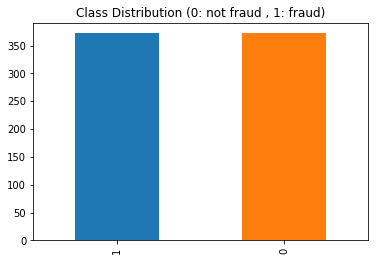

In [20]:
balanced_data['Class'].value_counts().plot.bar(title = 'Class Distribution (0: not fraud , 1: fraud)')

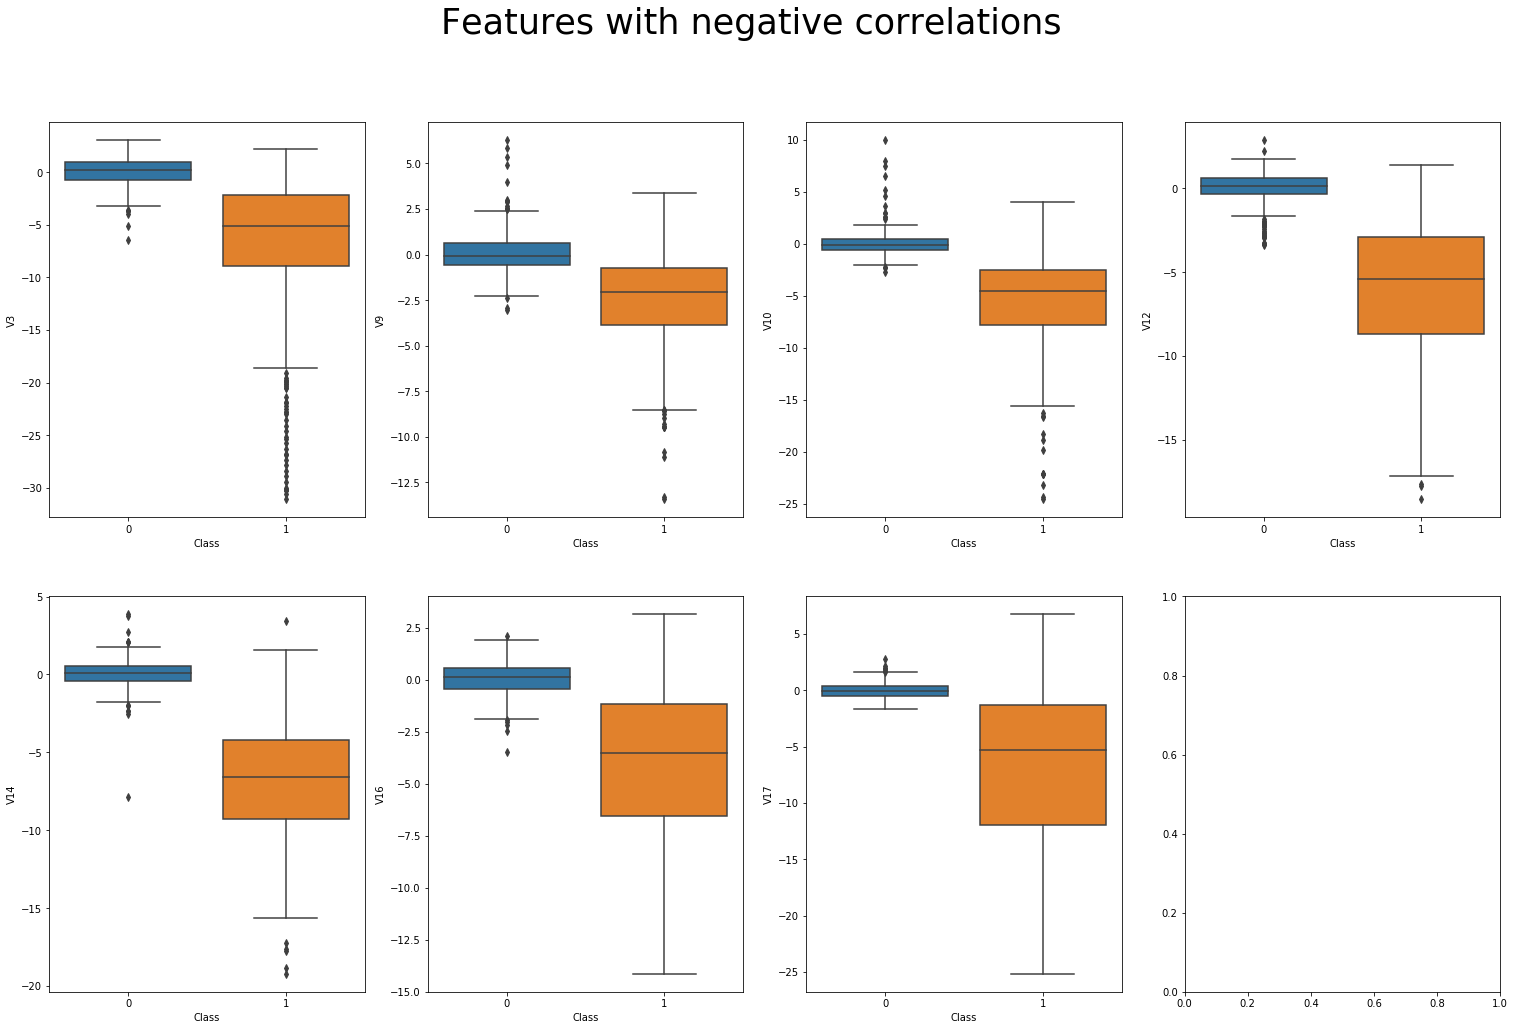

In [21]:
# Identify any outliers and remove them

#Figures with negative correlations [V3, V9, V10, V12, V14, V16,V17]
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(26,16))

fig.suptitle('Features with negative correlations', size = 35)
sns.boxplot(x= 'Class', y='V3', data= balanced_data, ax = axes[0,0])
sns.boxplot(x= 'Class', y='V9', data= balanced_data, ax = axes[0,1])
sns.boxplot(x= 'Class', y='V10', data= balanced_data, ax = axes[0,2])
sns.boxplot(x= 'Class', y='V12', data= balanced_data, ax = axes[0,3])
sns.boxplot(x= 'Class', y='V14', data= balanced_data, ax = axes[1,0])
sns.boxplot(x= 'Class', y='V16', data= balanced_data, ax = axes[1,1])
sns.boxplot(x= 'Class', y='V17', data= balanced_data, ax = axes[1,2])

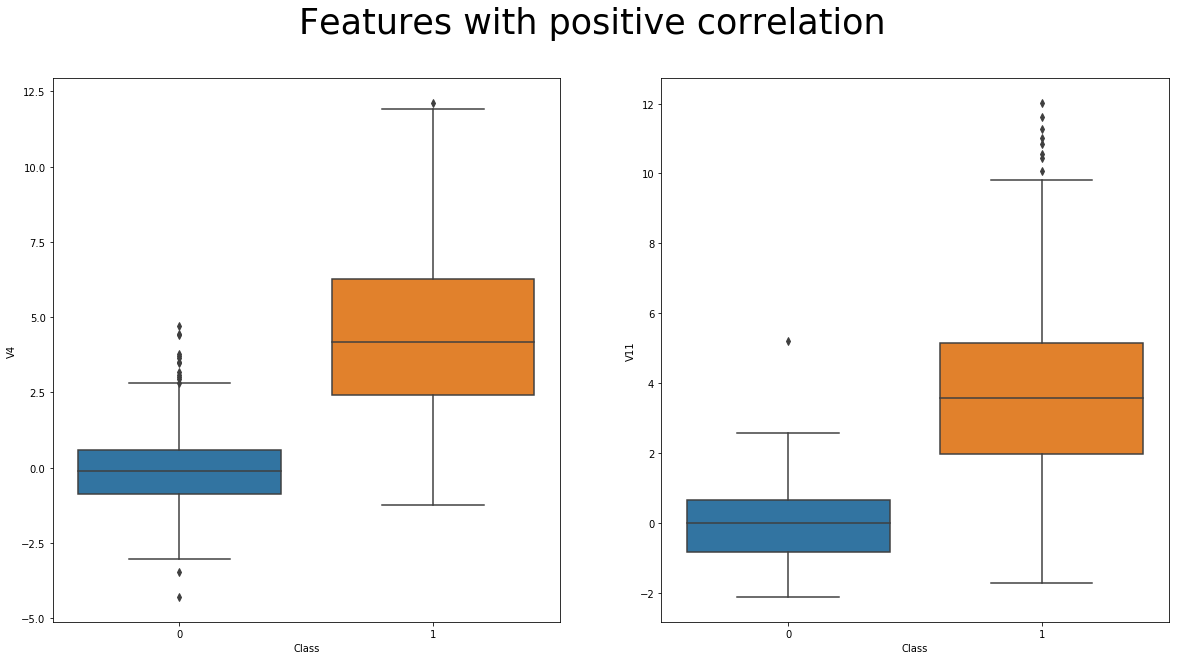

In [22]:
# features with positive correlations [V4, V11]
fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (20,10))

fig.suptitle('Features with positive correlation', size =35)
sns.boxplot(x='Class', y='V4', data= balanced_data, ax = axes[0])
sns.boxplot(x= 'Class', y='V11', data= balanced_data, ax = axes[1])

In [23]:
# Only remove extreme outliers since we don't want to reduce our dataset too much
quantile_one = balanced_data.quantile(0.25)
quantile_three= balanced_data.quantile(0.75)

inter_quan_range = quantile_three - quantile_one

new_data = balanced_data[~((balanced_data < (quantile_one - 2.5*inter_quan_range)) 
                           | (balanced_data > (quantile_three + 2.5*inter_quan_range))).any(axis = 1)]

In [24]:
data_removed = len(balanced_data) - len(new_data)
print(data_removed)
print(balanced_data.shape)
print(new_data.shape)

215
(744, 31)
(529, 31)


In [25]:
X = new_data.drop(['Class'], axis = 1)
y = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =0)

In [26]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_scaled,time_scaled
140826,-0.567646,1.181003,1.429673,0.006369,0.114715,-0.616243,0.970270,-0.214876,-0.177156,-0.070737,0.516560,0.333756,0.598793,-0.777408,1.108437,-0.125316,0.255710,-0.805770,-0.604542,0.307847,-0.292871,-0.463153,0.034073,0.362345,-0.229145,0.056259,0.222560,-0.070771,0.111647,-0.008517
156505,1.977568,-0.211678,-0.193684,0.534966,-0.623903,-0.679391,-0.568271,-0.132495,2.681222,-0.595527,0.137319,-2.248358,1.279855,1.602669,0.431119,0.176364,0.132850,0.276824,-0.395649,-0.302396,-0.266933,-0.418731,0.359994,-0.216086,-0.415142,-0.954781,0.030859,-0.033795,-0.149934,0.276859
122683,1.154786,0.182814,0.361292,0.585828,-0.321323,-0.419634,-0.161868,0.129509,-0.083158,-0.126955,1.853178,0.507885,-0.981883,0.162143,0.747764,0.373433,0.157142,-0.187894,-0.336593,-0.176027,-0.207098,-0.653243,0.184159,0.154760,0.049876,0.097625,-0.017159,0.017032,-0.279746,-0.094456
266284,2.095115,-0.039786,-2.463217,-0.263262,0.935827,-0.789660,0.641313,-0.323546,0.041826,0.188994,0.494530,0.461039,-0.575053,1.070999,-0.187908,-0.240066,-0.690226,0.222080,0.603383,-0.174505,0.166226,0.482999,-0.097555,0.239434,0.473655,0.219203,-0.102882,-0.084639,0.047230,0.911395
183936,-1.224564,-1.819197,1.870584,-2.555197,-0.852197,-0.736921,-0.941285,0.074970,-1.203707,0.630328,-1.520244,-1.388183,-0.089127,-0.999722,-0.511992,0.155710,0.019199,0.486613,-0.858995,-0.580122,-0.132522,0.260183,0.772283,-0.090421,-0.308858,-0.328884,0.169170,0.085456,0.279466,0.485579


In [27]:
# Turning the values into an array 
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [28]:
# Compiling model

# Logistic Regression


log_model = LogisticRegression().fit(X_train, y_train)


print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'
    .format(log_model.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'
    .format(log_model.score(X_test, y_test)))


# Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear', C=1.0).fit(X_train,y_train)

print('Accuracy of Support Vector Machine Classifier on training set: {:.2f}'
    .format(svm_model.score(X_train, y_train)))
print('Accuracy of Support Vector Machine Classifier on test set: {:.2f}'
    .format(svm_model.score(X_test, y_test)))


# KNN Classifier

knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)

print('Accuracy of KNN Classifier on training set: {:.2f}'
    .format(knn_model.score(X_train, y_train)))
print('Accuracy of KNN Classifier on test set: {:.2f}'
    .format(knn_model.score(X_test, y_test)))


# Decision Tree 

decision_tree_model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8, 
                                             random_state = 0).fit(X_train, y_train)

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'
    .format(decision_tree_model.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
    .format(decision_tree_model.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 0.97
Accuracy of Logistic Regression Classifier on test set: 0.94
Accuracy of Support Vector Machine Classifier on training set: 0.97
Accuracy of Support Vector Machine Classifier on test set: 0.94
Accuracy of KNN Classifier on training set: 0.95
Accuracy of KNN Classifier on test set: 0.95
Accuracy of Decision Tree Classifier on training set: 0.95
Accuracy of Decision Tree Classifier on test set: 0.94


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# Area under curve scores
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC()))
models.append(('K Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

scores = []
names = []

for name, model in models:
    kfold = KFold(n_splits= 10, random_state = 42)
    val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'roc_auc')
    scores.append(val_results)
    names.append(name)
    print(name + ':' + str(val_results.mean()) + ' std: ' + str(val_results.std()))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Regression:0.9736448508258029 std: 0.024334012605142213
Support Vector Machine:0.9681898086104603 std: 0.018677499547051037
K Nearest Neighbors:0.9552840564159787 std: 0.026699257896008476
Decision Tree:0.8741138461024363 std: 0.04409837765066708
